# Numerical Differentiation

Using a Taylor expansion of the (sufficiently often differentiable) function $f$ about $x$,

$$f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(x) + \ldots, $$

we can derive the following finite difference approximations to the derivative of $f$ at $x$.

## First-order forward finite difference 
$$\begin{align*}f'(x) &=\displaystyle \frac{f(x+h) - f(x)}{h} 
\color{red}{-\frac{h}{2!}f''(x)-\frac{h^2}{3!}f''(x)+\dots}\\
                      &=\displaystyle \frac{f(x+h) - f(x)}{h}  \color{red}{+\mathcal{O}(h)}
\end{align*}$$

Here's an example of a function whose derivatives we know analytically:

In [1]:
import numpy as np
f = lambda x: np.log(x)
x0 = 3
df_ex = 1/x0      #f'(x0)
d2f_ex = -1/x0**2 #f''(x0) 

Let's check if the error really decreases by a factor of 2 as we halve $h$, until ultimately roundoff errors spoil the convergence:

In [2]:
def fd_forward1(f, x, h):
    """fd_forward1 calculates the derivative of f at x 
    with First-order forward finite difference.
    """
    return (f(x + h) - f(x))/h
def fd_backward1(f, x, h):
    """fd_backward1 calculates the derivative of f at x 
    with First-order backward finite difference.
    """
    return (f(x)-f(x - h))/h
def fd_central1(f, x, h):
    """fd_central1 calculates the derivative of f at x 
    with First-order central finite difference.
    """
    return (f(x + h) - f(x-h))/(2*h)

In [3]:
h = .1
for m in np.arange(0,24):
    df = fd_forward1(f, x0, h)
    err = np.abs(df - df_ex)
    if m > 1:
        print('h = {:.2E}, err = {:.2E}, fac = {:.2f}'.format(h, err, err_old/err))
    err_old = err
    h = h/2

h = 2.50E-02, err = 1.38E-03, fac = 1.99
h = 1.25E-02, err = 6.93E-04, fac = 1.99
h = 6.25E-03, err = 3.47E-04, fac = 2.00
h = 3.13E-03, err = 1.73E-04, fac = 2.00
h = 1.56E-03, err = 8.68E-05, fac = 2.00
h = 7.81E-04, err = 4.34E-05, fac = 2.00
h = 3.91E-04, err = 2.17E-05, fac = 2.00
h = 1.95E-04, err = 1.09E-05, fac = 2.00
h = 9.77E-05, err = 5.43E-06, fac = 2.00
h = 4.88E-05, err = 2.71E-06, fac = 2.00
h = 2.44E-05, err = 1.36E-06, fac = 2.00
h = 1.22E-05, err = 6.78E-07, fac = 2.00
h = 6.10E-06, err = 3.39E-07, fac = 2.00
h = 3.05E-06, err = 1.70E-07, fac = 2.00
h = 1.53E-06, err = 8.48E-08, fac = 2.00
h = 7.63E-07, err = 4.26E-08, fac = 1.99
h = 3.81E-07, err = 2.16E-08, fac = 1.97
h = 1.91E-07, err = 1.06E-08, fac = 2.05
h = 9.54E-08, err = 5.90E-09, fac = 1.79
h = 4.77E-08, err = 5.90E-09, fac = 1.00
h = 2.38E-08, err = 1.06E-08, fac = 0.56
h = 1.19E-08, err = 1.24E-09, fac = 8.50


In [4]:
np.abs(-1)

1

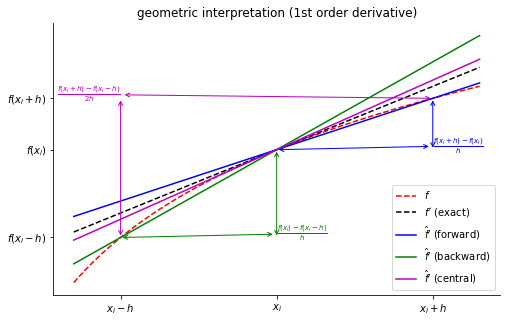

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 5))

x0 = 0.2
df = lambda x: 1/x
h = .1
a,b = x0-h,x0+h

x = np.linspace(a-.03,b+.03,200)
y = f(x) 
y0 = f(x0)
yt = df(x0) * (x - x0) + y0 
ytf = fd_forward1(f, x0, h) * (x - x0) + y0 
ytb = fd_backward1(f, x0, h) * (x - x0) + y0 
ytc = fd_central1(f, x0, h) * (x - x0) + y0 

ax.plot(x,y,'r--',label=r'$f$')
ax.plot(x,yt,'k--',label=r"$f'$ (exact)")
ax.plot(x,ytf,'b-',label=r"$\hat{f}'$ (forward)")
ax.plot(x,ytb,'g-',label=r"$\hat{f}'$ (backward)")
ax.plot(x,ytc,'m-',label=r"$\hat{f}'$ (central)")

ax.annotate(r'$\frac{f(x_i+h) - f(x_i)}{h}$', xy=(x0, y0), xytext=(x0+h, y0), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'b'},color='b')
ax.annotate('', xy=(x0+h, f(x0+h)), xytext=(x0+h, y0), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'b'},color='b')

ax.annotate(r'$\frac{f(x_i)-f(x_i-h)}{h}$', xy=(x0-h, f(x0-h)), xytext=(x0, f(x0-h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'g'},color='g')
ax.annotate('', xy=(x0, y0), xytext=(x0, f(x0-h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'g'},color='g')

ax.annotate(r'$\frac{f(x_i+h)-f(x_i-h)}{2h}$', xy=(x0+h, f(x0+h)), xytext=(x0-h, f(x0+h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'m'},color='m',horizontalalignment='right')
ax.annotate('', xy=(x0-h, f(x0-h)), xytext=(x0-h, f(x0+h)), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->','color':'m'},color='m')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([x0-h, x0, x0+h], [r'$x_i-h$', r'$x_i$', r'$x_i+h$'])
plt.yticks([f(x0-h), f(x0), f(x0+h)], [r'$f(x_i-h)$', r'$f(x_i)$', r'$f(x_i+h)$'])
plt.title('geometric interpretation (1st order derivative)')
plt.legend(loc='lower right')
plt.show()    